In [4]:
import numpy as np
from scipy import linalg as la
from scipy import optimize
import sympy
import matplotlib.pyplot as plt
sympy.init_printing()

In [2]:
# define model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1,2,3
y_exact = a + b*x + c*x**2

In [3]:
# simulate noisy data
m = 100
X = 1 - 2*np.random.rand(m)
Y = a + b*X + c*X**2 + np.random.randn(m)

In [5]:
# fit the data to model using linear least square
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = la.lstsq(A.T, Y)

In [6]:
y_fit = sol[0] + sol[1]*x +sol[2]*x**2

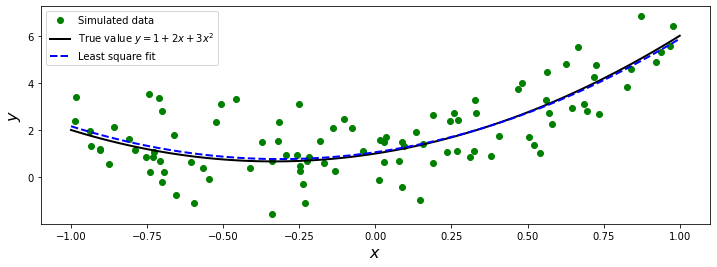

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X, Y, 'go', label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label=r'True value $y = 1+2x+3x^2$')
ax.plot(x, y_fit, '--b', lw=2, label='Least square fit')
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
ax.legend(loc='best')

In [10]:
# fit the model using linear least square
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

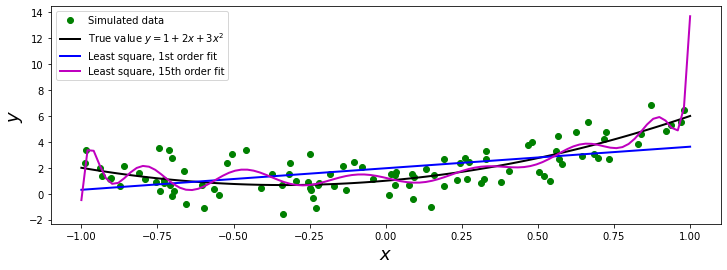

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X, Y, 'go', label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1+2x+3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square, 1st order fit')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square, 15th order fit')

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.legend(loc=2)